# INSTRUCTIONS:
#### Install plotly you would need in Geo Map subplots as part of our presentation 
*you can read on it via this link*  https://plot.ly/api/


# URLS for the project

## Neighborhood Data-Set:

#### https://www.huduser.gov/portal/datasets/fmr/smallarea/index.html

## Taxi Data-Set:

- yellow taxi & green taxi for 6 years(from 2010 to 2015)

`https://s3.amazonaws.com/nyc-tlc/trip+data/
                                           yellow_tripdata_yyyy-mm.csv
                                           green_tripdata_yyyy-mm.csv`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py

#import requests 
#from io import StringIO
#from io import BytesIO

%matplotlib inline 

In [2]:
### work with 2015 yellow data only ###
dir_path = '../data_science/data/taxi/2015/'

# make list for yyyy form - array of int
#yyyy = np.arange(2010,2016)

# make list for mm form - list of str
m_int = np.arange(1,13)
mm = []
for num in m_int:
    if num < 10:
        mm.append('0' + str(num))
    else:
        mm.append(str(num))

# y2015paths = file path list for yellow taxi datasets in 2015
y2015paths = []
#for yr in yyyy:
for mon in mm:
    y2015paths.append(dir_path + 'yellow_tripdata_' + '2015' + '-' + mon + '.csv')
    #taxi_urls.append(base_url + 'green_tripdata_' + str(yr) + '-' + mon + '.csv')

print(len(y2015paths)) # should be 12 lines
 
def read_all_files(files): 
    datasets = []
    for line in files:
        datasets.append(pd.read_csv(line))
    return (datasets)

12


In [3]:
%%time
yellow_2015 = read_all_files(y2015paths) 

OSError: File b'../data_science/data/taxi/2015/yellow_tripdata_2015-01.csv' does not exist

ERROR ===>>> can not read 12 csv files at once in my computer. 

Testing with just 1 csv file... => worked fine. 

In [3]:
# Adjust the file_path appropriate for your file location!!!
file_path = "../data_science/data/taxi/2015/yellow_tripdata_2015-01.csv"
yellow_2015_jan = pd.read_csv(file_path)
yellow_2015_jan.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.750618             1   
1                  N         -73.994415         40.759109             1   
2                  N         -73.951820         40.824413             2   
3                  N         -74.004326         40.719986             2   
4                  N         -74.004181         40.742653             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         12.0    1.0      0.5        3.25           0.0   
1         14.5    0.5      0.5        2.00           0.0   
2          9.5    0.5      0.5        0.00           0.0   
3          3.5    0.5      0.5        0.00           0.0   
4         15.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  
0                    0.3         17.05  
1                    0.3         17.80  
2                    0.3         10.80  
3                    0.3          4.80  
4                    0.3         16.30

In [4]:
print(yellow_2015_jan.shape)
yellow_2015_jan.columns

(12748986, 19)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [5]:
# Drop the irrelevant columns - refer data_dictionary_trip_records_yellow.pdf
cols = ['pickup_longitude', 'pickup_latitude', 
        'dropoff_longitude', 'dropoff_latitude', 
        'tip_amount']

yellow_2015_jan = pd.DataFrame(yellow_2015_jan, columns=cols)
yellow_2015_jan.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.993896        40.750111         -73.974785         40.750618   
1        -74.001648        40.724243         -73.994415         40.759109   
2        -73.963341        40.802788         -73.951820         40.824413   
3        -74.009087        40.713818         -74.004326         40.719986   
4        -73.971176        40.762428         -74.004181         40.742653   

   tip_amount  
0        3.25  
1        2.00  
2        0.00  
3        0.00  
4        0.00

In [6]:
# dropna()
print(yellow_2015_jan.shape)
yellow_2015_jan.dropna()
print(yellow_2015_jan.shape)

(12748986, 5)
(12748986, 5)


In [2]:
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2010-12.csv"
file = pd.read_csv(url)
file.shape

ConnectionResetError: [Errno 104] Connection reset by peer

belows are copied from previous code, "GENTRIFICATION_EXPLORER.ipython".

In [3]:
#save the data in array inorder to modify some attributes 
processed_data = [data_010,data_011,data_012,data_013,data_014,green_014]

#there some columns in our yellow taxi data-set that contains the same data we need but diff column name
#fix for it
for i in range(len(processed_data)):
    for j in processed_data[i].columns.values:
        if j == 'lpep_dropoff_datetime' or j == 'tpep_dropoff_datetime':
            processed_data[i].rename(columns={j: 'dropoff_datetime' }, inplace=True)
            
        if j == 'lpep_pickup_datetime'   or j == 'tpep_pickup_datetime':
            processed_data[i].rename(columns={j: 'pickup_datetime' }, inplace=True)

#cleaning other yellow taxi data-set so that it only contains the columns we need
def needed_col(data):
    cols_y = ['dropoff_latitude', 'dropoff_longitude','dropoff_datetime' , 'pickup_datetime',
              'pickup_latitude','pickup_longitude','tip_amount','trip_distance']
    refine_data = pd.DataFrame(data, columns = cols_y)
    return (refine_data)

y_data_010 = needed_col(data_010)
y_data_011 = needed_col(data_011)
y_data_012 = needed_col(data_012)
y_data_013 = needed_col(data_013)
y_data_014 = needed_col(data_014)

In [4]:
y_data_010.head()

dropoff_latitude  dropoff_longitude         dropoff_datetime  \
0         40.813202         -73.945152  0008-01-10T20:50:52.000   
1         40.723186         -73.942223  0011-01-03T20:02:34.000   
2         40.634247         -74.025093  0028-01-06T00:23:00.000   
3         40.759521         -73.778999  0016-01-01T21:48:51.000   
4         40.709873         -74.014717  0001-01-11T01:43:23.000   

           pickup_datetime  pickup_latitude  pickup_longitude  tip_amount  \
0  0008-01-10T20:44:53.000        40.822823        -73.938164         0.0   
1  0011-01-03T19:57:48.000        40.729080        -73.953835         2.0   
2  0028-01-06T00:00:03.000        40.684532        -73.978569         0.0   
3  0016-01-01T21:38:35.000        40.759911        -73.829147         0.0   
4  0001-01-11T01:14:08.000        40.721851        -73.950264         0.0   

   trip_distance  
0           1.07  
1           1.10  
2           6.09  
3           2.98  
4           5.70

In [5]:
y_data_011.head()

dropoff_latitude  dropoff_longitude         dropoff_datetime  \
0         40.724422         -73.994383  2011-06-21T22:14:00.000   
1         40.711134         -74.016117  2011-08-08T23:57:45.000   
2          0.000000           0.000000  2011-09-15T03:58:54.000   
3         40.748888         -73.975833  2011-07-19T10:19:00.000   
4         40.744913         -73.945500  2011-08-31T14:05:00.000   

           pickup_datetime  pickup_latitude  pickup_longitude  tip_amount  \
0  2011-06-21T22:03:00.000        40.707625        -74.001553        0.00   
1  2011-08-08T23:49:24.000        40.740509        -74.005630        0.00   
2  2011-09-15T03:54:48.000         0.000000          0.000000        1.89   
3  2011-07-19T10:08:00.000        40.747892        -73.988863        0.00   
4  2011-08-31T13:46:00.000        40.751040        -73.945000        0.00   

   trip_distance  
0           1.49  
1           2.50  
2           1.20  
3           0.96  
4           3.06

In [6]:
y_data_012.head()

dropoff_latitude  dropoff_longitude         dropoff_datetime  \
0         40.770407         -73.986893  2012-06-25T20:47:00.000   
1         40.713845         -73.997867  2012-08-11T21:44:00.000   
2         40.727895         -73.993357  2012-02-24T06:51:48.000   
3         40.780051         -73.956726  2012-04-26T21:36:11.000   
4         40.762655         -74.001242  2012-06-29T09:06:31.000   

           pickup_datetime  pickup_latitude  pickup_longitude  tip_amount  \
0  2012-06-25T20:39:00.000        40.767928        -73.962740         1.0   
1  2012-08-11T21:35:00.000        40.751447        -73.975002         0.0   
2  2012-02-24T06:38:22.000        40.763360        -73.992565         1.0   
3  2012-04-26T21:33:14.000        40.772920        -73.958413         0.0   
4  2012-06-29T08:56:26.000        40.762923        -73.982564         0.0   

   trip_distance  
0           1.70  
1           1.42  
2           3.20  
3           0.60  
4           1.30

In [7]:
y_data_013.head()

dropoff_latitude  dropoff_longitude         dropoff_datetime  \
0         40.761542         -73.976697  2013-01-28T10:23:00.000   
1         40.715045         -74.016115  2013-06-17T14:37:14.000   
2         40.760480         -73.971565  2013-05-01T07:57:00.000   
3         40.668347         -73.980303  2013-10-30T20:02:12.000   
4         40.763215         -73.974433  2013-03-04T11:52:00.000   

           pickup_datetime  pickup_latitude  pickup_longitude  tip_amount  \
0  2013-01-28T10:20:00.000        40.762452        -73.978110        0.00   
1  2013-06-17T14:32:06.000        40.712108        -74.010500        0.00   
2  2013-05-01T07:40:00.000        40.737210        -73.996870        2.60   
3  2013-10-30T19:41:24.000        40.725030        -74.005473        5.45   
4  2013-03-04T11:44:00.000        40.751745        -73.986142        0.00   

   trip_distance  
0           0.26  
1           0.50  
2           2.70  
3           5.80  
4           1.19

In [8]:
y_data_014.head()

dropoff_latitude  dropoff_longitude         dropoff_datetime  \
0         40.770192         -73.918685  2014-09-20T01:59:00.000   
1         40.767192         -73.971332  2014-05-19T10:43:00.000   
2         40.760112         -73.972257  2014-05-07T07:05:17.000   
3         40.773650         -73.963809  2014-03-25T19:54:10.000   
4         40.749665         -73.991557  2014-07-07T16:12:00.000   

           pickup_datetime  pickup_latitude  pickup_longitude  tip_amount  \
0  2014-09-20T01:33:00.000        40.735232        -73.991880         0.0   
1  2014-05-19T10:35:00.000        40.772880        -73.981728         0.0   
2  2014-05-07T06:55:34.000        40.777891        -73.952068         2.0   
3  2014-03-25T19:50:35.000        40.772541        -73.958471         0.0   
4  2014-07-07T16:00:00.000        40.761137        -73.977500         0.0   

   trip_distance  
0           6.27  
1           0.82  
2           1.90  
3           0.30  
4           1.34

In [9]:
#append the yellow taxi data-set with the green taxi data-set for 2014
y_data_014.append(green_014)
y_data_014.head()

dropoff_latitude  dropoff_longitude         dropoff_datetime  \
0         40.770192         -73.918685  2014-09-20T01:59:00.000   
1         40.767192         -73.971332  2014-05-19T10:43:00.000   
2         40.760112         -73.972257  2014-05-07T07:05:17.000   
3         40.773650         -73.963809  2014-03-25T19:54:10.000   
4         40.749665         -73.991557  2014-07-07T16:12:00.000   

           pickup_datetime  pickup_latitude  pickup_longitude  tip_amount  \
0  2014-09-20T01:33:00.000        40.735232        -73.991880         0.0   
1  2014-05-19T10:35:00.000        40.772880        -73.981728         0.0   
2  2014-05-07T06:55:34.000        40.777891        -73.952068         2.0   
3  2014-03-25T19:50:35.000        40.772541        -73.958471         0.0   
4  2014-07-07T16:00:00.000        40.761137        -73.977500         0.0   

   trip_distance  
0           6.27  
1           0.82  
2           1.90  
3           0.30  
4           1.34

E                
-73.964212
40.725870

N
-73.954141
40.739439

S
40.569736
-73.99999

W
40.626839
-73.847699

Mid = 40.638583 -73.954122

In [10]:
x_y = [40.638583, -73.954122]
radius = np.sqrt((-73.954141 + 73.954122 )**2 + (40.739439 - 40.638583)**2)

#check = ReWeek1tb2[ReWeek1tb2.DROPTIME <= '2016-11-1 05:00']

In [11]:
dropoff_brooklyn_10 = y_data_010[np.sqrt((y_data_010.dropoff_latitude - x_y[0])**2 
                                     +(y_data_010.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_10  = y_data_010[np.sqrt((y_data_010.pickup_latitude - x_y[0])**2 
                                     +(y_data_010.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_10 = pickup_brooklyn_10.append(dropoff_brooklyn_10)

#trips_in_Bk.to_csv('trips_in_BK.CSV', sep='\t')
print (pickup_brooklyn_10.shape)
print (dropoff_brooklyn_10.shape)
print (trips_in_Bk_10.shape)

(353, 8)
(319, 8)
(672, 8)


In [12]:
dropoff_brooklyn_11 = y_data_011[np.sqrt((y_data_011.dropoff_latitude - x_y[0])**2 
                                     +(y_data_011.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_11  = y_data_011[np.sqrt((y_data_011.pickup_latitude - x_y[0])**2 
                                     +(y_data_011.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_11 = pickup_brooklyn_11.append(dropoff_brooklyn_11)

trips_in_Bk_11.to_csv('trips_in_BK_11.CSV', sep='\t')
print (pickup_brooklyn_11.shape)
print (dropoff_brooklyn_11.shape)
print (trips_in_Bk_11.shape)

(172, 8)
(199, 8)
(371, 8)


In [13]:
dropoff_brooklyn_12 = y_data_012[np.sqrt((y_data_012.dropoff_latitude - x_y[0])**2 
                                     +(y_data_012.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_12  = y_data_012[np.sqrt((y_data_012.pickup_latitude - x_y[0])**2 
                                     +(y_data_012.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_12 = pickup_brooklyn_12.append(dropoff_brooklyn_12)

trips_in_Bk_12.to_csv('trips_in_BK_12.CSV', sep='\t')
print (pickup_brooklyn_12.shape)
print (dropoff_brooklyn_12.shape)
print (trips_in_Bk_12.shape)

(149, 8)
(161, 8)
(310, 8)


In [14]:
dropoff_brooklyn_13 = y_data_013[np.sqrt((y_data_013.dropoff_latitude - x_y[0])**2 
                                     +(y_data_013.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_13  = y_data_013[np.sqrt((y_data_013.pickup_latitude - x_y[0])**2 
                                     +(y_data_013.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_13 = pickup_brooklyn_13.append(dropoff_brooklyn_13)

trips_in_Bk_13.to_csv('trips_in_BK_13.CSV', sep='\t')
print (pickup_brooklyn_13.shape)
print (dropoff_brooklyn_13.shape)
print (trips_in_Bk_13.shape)

(166, 8)
(180, 8)
(346, 8)


In [15]:
dropoff_brooklyn_14 = y_data_013[np.sqrt((y_data_014.dropoff_latitude - x_y[0])**2 
                                     +(y_data_014.dropoff_longitude - x_y[1])**2) <= radius] 

pickup_brooklyn_14  = y_data_013[np.sqrt((y_data_014.pickup_latitude - x_y[0])**2 
                                     +(y_data_014.pickup_longitude - x_y[1])**2) <= radius] 

trips_in_Bk_14 = pickup_brooklyn_14.append(dropoff_brooklyn_14)

trips_in_Bk_14.to_csv('trips_in_BK_14.CSV', sep='\t')
print (pickup_brooklyn_14.shape)
print (dropoff_brooklyn_14.shape)
print (trips_in_Bk_14.shape)

(152, 8)
(177, 8)
(329, 8)


In [16]:
tb = {'2010': trips_in_Bk_10.count().iloc[0], 
      '2011': trips_in_Bk_11.count().iloc[0],
      '2012': trips_in_Bk_12.count().iloc[0],
      '2013': trips_in_Bk_13.count().iloc[0],
      '2014': trips_in_Bk_14.count().iloc[0],}
trips_in_Bk = pd.Series(tb)
trips_in_Bk


2010    672
2011    371
2012    310
2013    346
2014    329
dtype: int64

TypeError: 'Text' object is not callable

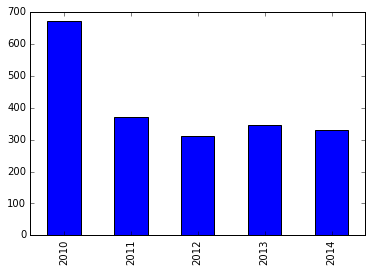

In [23]:
fig = trips_in_Bk.plot(kind='bar')
fig.title('Number of taxi trips in Brooklyn')

In [26]:
import plotly.plotly as py
from plotly.graph_objs import *


import plotly.tools as tls
tls.set_credentials_file(username='cjallow', api_key='pwa9fBcF5ohbTCKGGWdq')

trace1 = Choropleth(
    z=['1', '1', '1', '1', '1', '1', '1'],
    autocolorscale=False,
    colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(186,58,51)']],
    hoverinfo='text',
    locationmode='USA-states',
    locations=['AR', 'GA', 'KY', 'MO', 'UT', 'TX', 'WY'],
    name='Republican',
    showscale=False,
    text=['Arkansas', 'Georgia', 'Kentucky', 'Missouri', 'Utah', 'Texas', 'Wyoming'],
    zauto=False,
    zmax=1,
    zmin=0,
)
trace2 = Choropleth(
    z=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    autocolorscale=False,
    colorscale=[[0, 'rgb(255,255,255)'], [1, 'rgb(68,94,150)']],
    hoverinfo='text',
    locationmode='USA-states',
    locations=['CA', 'CI', 'DOC', 'IL', 'MD', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT'],
    name='Democrat',
    showscale=False,
    text=['California', 'Connecticut', 'District of Columbia', 'Illinois', 
          'Maryland', 'New Jersey', 'New Mexico', 'New York', 'Oregon',
          'Rhode Island', 'Vermont'],
    zauto=False,
    zmax=1,
    zmin=0,
)
trace3 = Choropleth(
    z=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    autocolorscale=False,
    colorscale=[[0, 'rgb(255, 255, 255)'], [1, 'rgb(187, 170, 144)']],
    hoverinfo='text',
    locationmode='USA-states',
    locations=['CO', 'FL', 'MI', 'MN', 'NH', 'OH', 'VA', 'WI'],
    name='Swing State',
    showscale=False,
    text=['Colorado', 'Florida', 'Michigan', 'Minnesota', 
          'New Hampshire', 'Ohio', 'Virginia', 'Wisconsin'],
    zauto=False,
    zmax=1,
    zmin=0,
)

data = Data([trace1, trace2, trace3])
layout = Layout(
    autosize=False,
    geo=dict(
        countrycolor='rgb(102, 102, 102)',
        countrywidth=0.1,
        lakecolor='rgb(255, 255, 255)',
        landcolor='rgba(237, 247, 138, 0.28)',
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showland=True,
        showrivers=False,
        showsubunits=True,
        subunitcolor='rgb(102, 102, 102)',
        subunitwidth=0.5
    ),
    hovermode='closest',
    images=list([
        dict(
            x=1,
            y=0.6,
            sizex=0.155,
            sizey=0.4,
            source='http://i.imgur.com/Xe3f1zg.png',
            xanchor='right',
            xref='paper',
            yanchor='bottom',
            yref='paper'
        )
    ]),
    showlegend=True,
    title='<b>PACE Approved legislation</b>',
    width= 800,
    margin = dict(
        l=0,
        r=50,
        b=100,
        t=100,
        pad=4)
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='pace')


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~cjallow/0 or inside your plot.ly account where it is named 'pace'


In [27]:


scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = y_data_014['pickup_longitude'],
        lat = y_data_014['pickup_latitude'],
        #text = df['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            #color = df_sum_arrivals['cnt'],
            #cmax = df_sum_arrivals['cnt'].max(),
            #colorbar=dict(
               # title="Trips in BK"
            #)
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        #colorbar = True,   
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 1    
        ),
    )

#fig = dict( data=data, layout=layout )
#url = py.plot( fig, validate=False, filename='d3-airports' )
fig = Figure( data=data, layout=layout )
py.iplot(fig, filename='k')


In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

map = Basemap(projection='cyl', 
              lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

lons = y_data_014.pickup_longitude.values
lats = y_data_014.pickup_latitude.values
#cases = np.array([1971, 7069, 6073, 4, 6, 20, 1, 1])
#deaths = np.array([1192, 2964, 1250, 1, 5, 8, 0, 0])
#places = np.array(['Guinea', 'Liberia', 'Sierra Leone','United States', 'Mali', 'Nigeria', 'Senegal', 'Spain'])

x, y = map(lons, lats)

map.scatter(x, y, c='r', alpha=0.5)

axins = zoomed_inset_axes(ax, 7, loc=1)
axins.set_xlim(-20, 0)
axins.set_ylim(3, 18)

plt.xticks(visible=False)
plt.yticks(visible=False)

map2 = Basemap(llcrnrlon=-74.260380,llcrnrlat=40.485808,
               urcrnrlon=-73.699206,urcrnrlat=40.917691, ax=axins, ellps='WGS84',
            resolution='h', area_thresh=0.6)

map2.drawmapboundary(fill_color='#7777ff')
map2.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map2.drawcoastlines()
map2.drawcountries()
map2.drawstates()

map2.scatter(x, y, c='r', alpha=0.5)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

ImportError: No module named 'mpl_toolkits.basemap'

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

# create the map
map = Basemap(llcrnrlon=-74.260380,llcrnrlat=40.485808,
               urcrnrlon=-73.699206,urcrnrlat=40.917691, ax=axins, ellps='WGS84',
            resolution='h', area_thresh=0.6)
# load the shape file with "states"
map.readshapefile('shapefiles/geo_export_7e54be64-4015-4221-9615-1045aa077da2',name = 'Brooklyn',drawbounds=True)

# set a geo coordinate (for example, new york)
lat = 0
lon = 0
x,y = map(lat, lon)

# place it on the map
map.plot(x, y, 'ro', markersize=4)
map.drawmapboundary(fill_color='#7777ff')
map.fillcontinents(color='#ddaa66', lake_color='#7777ff', zorder=0)
map.drawcoastlines()

plt.show()


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

map.drawmapboundary()
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('shapefiles/geo_export_7e54be64-4015-4221-9615-1045aa077da2', 'geo_export_7e54be64-4015-4221-9615-1045aa077da2', 
                 drawbounds=True)

plt.show()

In [ ]:
y_data_014.to_csv('y_data_014.CSV', sep='\t')